# KNN Classification on the Iris Dataset with scikit-learn

## By Christopher Hauman
<br>

### This will quickly run through using scikit-learn to perform knn classification on the [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset. This is one of the best places to start learning about [supervised machine learning](https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d). If you're not familiar with knn, you should start [here](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/).
<br>

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://github.com/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

In [15]:
# import packages

# datasets has the Iris dataset
from sklearn import datasets

# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

First, we'll load the iris dataset. Note that this is in the form of a numPy array.

In [16]:
# load dataset
iris = datasets.load_iris()
iris.data.shape

(150, 4)

We can see the iris data has 150 observations (rows) and 4 variables (columns).
<br>
We'll quickly run through a few useful methods and attributes for these data types. **.keys()** gives the keys of the data.

In [17]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

<br>

**.DESCR** gives a description of the data:

In [18]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

<br>

Before we move forward, we'll cover some common language for machine learning. When performing knn classification, we're trying to accurately classify something based on certain data we're given. i.e., we're using **predictor variables/features** to predict the value of a **target variable**. Let's look at the **feature names** and **target names** for the iris data:

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

To put it into context, we're going to try and use the sepal length, sepal width, petal length, and petal width values of each observation to **categorize** that observation as a setosa iris, versicolor iris, or virginica iris. We have the correct target values to help us build the model and test its accuracy.

In [21]:
# load the data and target variables
X, y = iris.data, iris.target

In [22]:
# create DataFrame with iris data
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Note this DataFrame doesn't have the target values. We have no idea what type of iris they are.
<br>

If we want, we can add the target values to a copy of the DataFrame if you'd to have them together.

In [23]:
# copy df
df_labeled = df.copy()
# add species to df_labeled
df_labeled["species"] = y

df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can also add the actual names of the species to the data by adding the iris name to the DataFrame based on their corresponding target value. This can be used for plotting or other analysis.

In [24]:
df_labeled2 = df.copy()

# for loop to name species based on target variable (0='setosa', 1='versicolor', 2='virginica')
names = []
for i in y:
    if i == 0:
        names.append("setosa")
    elif i == 1:
        names.append("versicolor")
    else:
        names.append("virginica")
        
# add names to df_labeled2
df_labeled2["species"] = names

df_labeled2.head()

# output as csv
df_labeled2.to_csv("labeled_iris.csv")

Now that we've imported the data, let's take a look at the sepals and petals of the iris data:

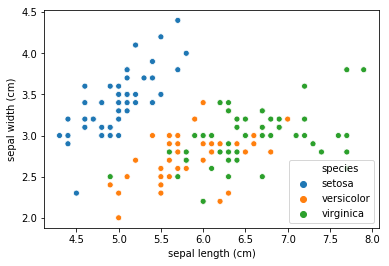

In [25]:
plt.figure()
sns.scatterplot(x='sepal length (cm)', y="sepal width (cm)", hue='species', data=df_labeled2)
plt.show()

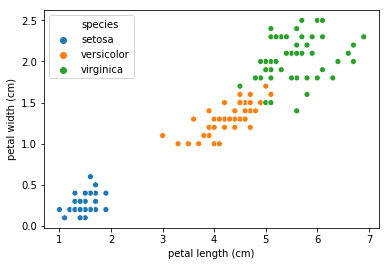

In [26]:
plt.figure()
sns.scatterplot(x='petal length (cm)', y="petal width (cm)", hue='species', data=df_labeled2)
plt.show()

Upon seeing the second plot, it's clear that there's a very strong correlation between petal length and width, much stronger than for the sepal data. Additionally, we should note that the species of iris are grouped much more clearly by the petals (though setosas do appear to have some distinct values for sepal width and length).

Now it's time to perform the knn classification on the data. To do this we need to split our data into training and test sets. We'll fit the model on training set, and then test its accuracy on the test set. First, let's import some tools we'll need.

In [27]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier

# for splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# for computing the accuracy of the model.
from sklearn import metrics

Now let's split the iris data into training and test sets using **train_test_split**. 

- The *test_size* argument determined what portion of the data will randomly be selected for the test set (in this case 25% of it).
- The random set argument selects the seed for the random selection. If you use the same seed, the function will always select the same data for the training and test sets. This is good for replicating results.
- stratify=y ensures that the random selection will include a representative sample each species of iris in the training and test sets. So if 20% of the observations were setosas, 20% of the training and test sets will be data for setosas.

In [28]:
# take 25% of the data for the test set and stratify by iris species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

Now we can create our knn classifier, which we'll use to fit the data.

In [29]:
# use k=11 to create the classifier
knn = KNeighborsClassifier(n_neighbors=11)

Note that we chose an odd value for k. We should always use an odd value for k, as it will ensure the algorithm doesn't encounter a tie between two categories.
<br>

It's time to fit the model. Remember to use the training data and target values to do this:

In [30]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

<br>
We have our first model! Let's see how the model will classify the iris data without having access to the target values. We'll predict the values and then compare it to the target values:

In [31]:
# perform the knn prediction wihtout the target values. Note that df essentially the same as iris['data'].
y_pred = knn.predict(X_test)

# compare the prediction to the target values
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

We see the prediction was very close! It only got a one value incorrect. We can use either of the following methods to calculate the accuracy as a decimal value:

In [32]:
# print accuracy score
print(metrics.accuracy_score(y_pred, y_test))

print(knn.score(X_test, y_test))

0.9736842105263158
0.9736842105263158


We see our current fit is 97.4% accurate. We can also get some more summary statistics on our fit by using classification report and confusion matric like so:

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Let's see if we can increase the accuracy by looping through a few more k values and changing the size of the test set to see what yields the highest accuracy model. This uses some code which was adapted from [DataCamp](https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=12):

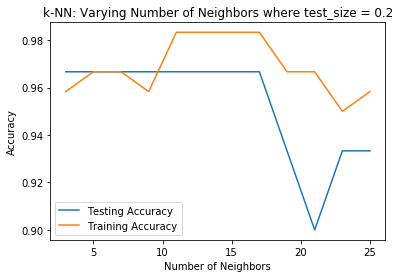

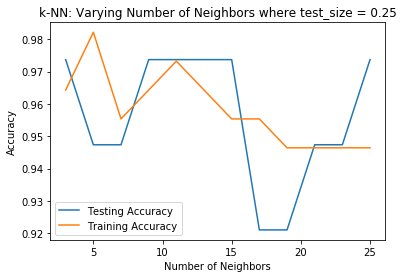

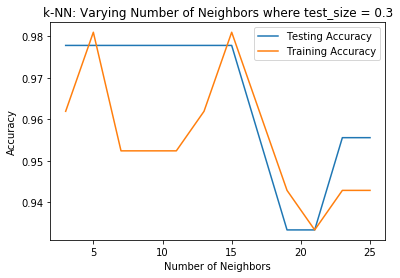

In [34]:
# arrange k values from 
k_vals = np.arange(3, 27, 2)
train_accuracy = np.empty(len(k_vals))
test_accuracy = np.empty(len(k_vals))
test_size = [.2, .25, .3]


for size in test_size:
    # take 25% of the data for the test set and stratify by iris species
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1, stratify=y)
    
    # Loop over different values of k
    for i, k in enumerate(k_vals):
        # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
    
        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

        #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)
    
    # Generate plot
    plt.title("k-NN: Varying Number of Neighbors where test_size = " + str(size))
    plt.plot(k_vals, test_accuracy, label = 'Testing Accuracy')
    plt.plot(k_vals, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

We see that the size of the training set and number of neighbors significantly affects the results, but the most accurate models tend to have k betweeen 9 and 15. Keep in mind this form of testing for the maximum accuracy would be very computationally intensive for a large dataset. We could also vary the random_state argument of train_test_split to see how the random selection affects the model.
<br>

Choosing an optimal k can be very difficult, but a simple approach is to simply take k = sqrt(n), where n is the number of observations you have. You can read much more about choosing a k-value [here](https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606). In this case the square root of 150 is 12.2, which we could round up to 13 or down to 11 (remember k needs to be odd) and we'd have the same accuracy. 

In [35]:
from sklearn.model_selection import GridSearchCV

In [1]:
param_grid = {'n_neighbors': np.arange(1,51,2)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)

knn_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

NameError: name 'np' is not defined

<br>
It's that simple! You've now performed your first machine learning model! There are countless applications for knn classification, and many other incredibly machine learning algorithms you can learn about.
<br>
Please feel free to email me at christopherhauman@gmail.com if you have any questions.